In [1]:
import pandas as pd

# Load dataset
df = pd.read_excel('hiv_care_treatment.xlsx')

In [2]:
print("Original DataFrame:")
print(df.head())
print("\nDataFrame Info:")
print(df.info())
print("\nMissing Values:")
print(df.isna().sum())

Original DataFrame:
  Patient_ID  Age Gender Date_of_Diagnosis Treatment_Start_Date  \
0   KYM 0756   21      F        2019-08-06           2019-08-06   
1   KYM 0710   33      F        2020-01-16           2020-01-16   
2   KYM 0735   23      F        2020-04-05           2020-04-05   
3   KYM 0723   51      F        2014-11-13           2014-11-13   
4   KYM 0741   44      M        2020-04-14           2020-04-14   

  Treatment_Type  Viral_Load  CD4_Count Adherence_Level Side_Effects  \
0    TDF/3TC/DTG         1.0        NaN  GOOD ADHERENCE   2023-12-05   
1    TDF/3TC/DTG    188000.0        NaN  GOOD ADHERENCE   2022-10-04   
2    TDF/3TC/DTG     17690.0        NaN  GOOD ADHERENCE   2021-09-28   
3    TDF/3TC/DTG         1.0        NaN  GOOD ADHERENCE   2022-05-10   
4    TDF/3TC/DTG         1.0        NaN  GOOD ADHERENCE   2024-05-08   

  Last_Visit_Date  
0      2024-01-23  
1      2022-11-01  
2      2021-10-26  
3      2022-08-02  
4      2024-07-31  

DataFrame Info:
<class 

In [3]:
# Fill missing values or drop rows/columns
df['Viral_Load'].fillna(df['Viral_Load'].mean(), inplace=True)
df['CD4_Count'].fillna(df['CD4_Count'].median(), inplace=True)
df.dropna(subset=['Patient_ID'], inplace=True)  # Essential column

# Alternatively, drop columns with too many missing values
df.dropna(thresh=len(df)*0.5, axis=1, inplace=True)

C:\Users\Stores\AppData\Local\Temp\ipykernel_7416\1219786649.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Viral_Load'].fillna(df['Viral_Load'].mean(), inplace=True)
C:\Users\Stores\AppData\Local\Temp\ipykernel_7416\1219786649.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a 

In [4]:
print("\nDuplicates Before Removal:")
print(df.duplicated().sum())

df.drop_duplicates(inplace=True)

print("\nDuplicates After Removal:")
print(df.duplicated().sum())


Duplicates Before Removal:
0

Duplicates After Removal:
0


In [5]:
# Standardize 'Gender' column
df['Gender'] = df['Gender'].str.upper().replace({'FEMALE': 'F', 'MALE': 'M'})

# Correct any typos in 'Treatment_Type'
df['Treatment_Type'] = df['Treatment_Type'].str.upper().replace({'ART': 'Antiretroviral Therapy', 'PREP': 'Pre-Exposure Prophylaxis'})

In [6]:
# Convert dates to datetime format
df['Date_of_Diagnosis'] = pd.to_datetime(df['Date_of_Diagnosis'])
df['Treatment_Start_Date'] = pd.to_datetime(df['Treatment_Start_Date'])
df['Last_Visit_Date'] = pd.to_datetime(df['Last_Visit_Date'])

# Convert numerical data to appropriate types
df['Age'] = df['Age'].astype(int)
df['Viral_Load'] = df['Viral_Load'].astype(float)
df['CD4_Count'] = df['CD4_Count'].astype(float)

In [7]:
print("\nDataFrame Snapshot Before Cleaning:")
print(df.head())

df_cleaned = df.copy()  # Work on a copy for demonstration

# Apply cleaning steps...

print("\nDataFrame Snapshot After Cleaning:")
print(df_cleaned.head())


DataFrame Snapshot Before Cleaning:
  Patient_ID  Age Gender Date_of_Diagnosis Treatment_Start_Date  \
0   KYM 0756   21      F        2019-08-06           2019-08-06   
1   KYM 0710   33      F        2020-01-16           2020-01-16   
2   KYM 0735   23      F        2020-04-05           2020-04-05   
3   KYM 0723   51      F        2014-11-13           2014-11-13   
4   KYM 0741   44      M        2020-04-14           2020-04-14   

  Treatment_Type  Viral_Load  CD4_Count Adherence_Level Side_Effects  \
0    TDF/3TC/DTG         1.0      470.5  GOOD ADHERENCE   2023-12-05   
1    TDF/3TC/DTG    188000.0      470.5  GOOD ADHERENCE   2022-10-04   
2    TDF/3TC/DTG     17690.0      470.5  GOOD ADHERENCE   2021-09-28   
3    TDF/3TC/DTG         1.0      470.5  GOOD ADHERENCE   2022-05-10   
4    TDF/3TC/DTG         1.0      470.5  GOOD ADHERENCE   2024-05-08   

  Last_Visit_Date  
0      2024-01-23  
1      2022-11-01  
2      2021-10-26  
3      2022-08-02  
4      2024-07-31  

DataFr

In [8]:
additional_data = {
    'Patient_ID': [101, 102, 103, 104],
    'Follow_Up_Visit': ['2024-01-15', '2024-02-20', '2024-03-10', '2024-04-05'],
    'Notes': ['Stable', 'Needs adjustment', 'Adherence issues', 'Improved']
}
df_additional = pd.DataFrame(additional_data)
df_additional['Follow_Up_Visit'] = pd.to_datetime(df_additional['Follow_Up_Visit'])

In [9]:
# Merge datasets on Patient_ID
df_merged = pd.merge(df_cleaned, df_additional, on='Patient_ID', how='left')

       Patient_ID          Age Gender              Date_of_Diagnosis  \
count        1013  1013.000000   1013                            970   
unique       1013          NaN      2                            NaN   
top      KYM 0756          NaN      F                            NaN   
freq            1          NaN    682                            NaN   
mean          NaN    36.809477    NaN  2017-10-06 02:35:52.577319680   
min           NaN     2.000000    NaN            2005-07-19 00:00:00   
25%           NaN    28.000000    NaN            2015-02-02 06:00:00   
50%           NaN    35.000000    NaN            2018-02-26 00:00:00   
75%           NaN    45.000000    NaN            2020-04-05 18:00:00   
max           NaN    86.000000    NaN            2024-07-10 00:00:00   
std           NaN    13.197355    NaN                            NaN   

                 Treatment_Start_Date Treatment_Type     Viral_Load  \
count                             970            938    1013.000

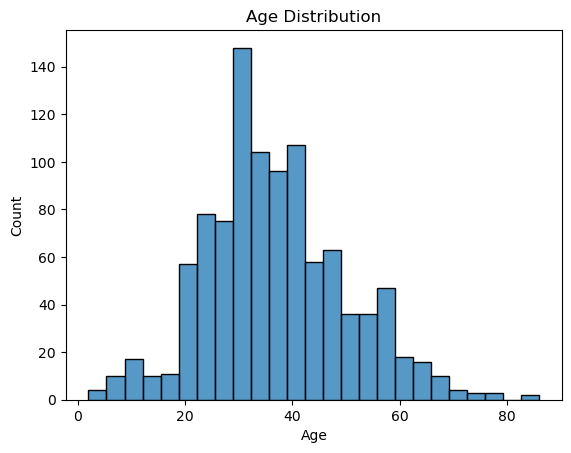

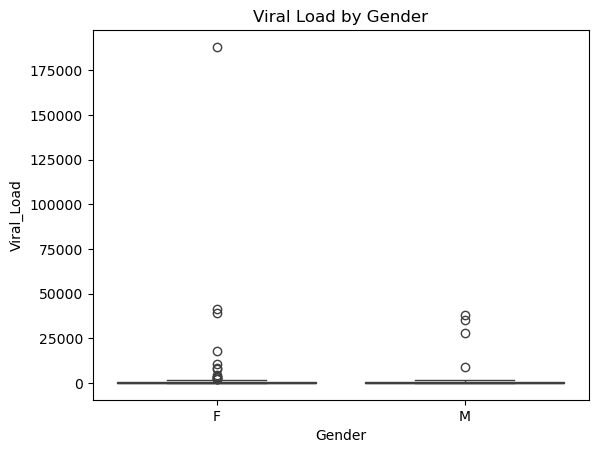

ValueError: could not convert string to float: 'KYM 0756'

In [10]:
#Exploratory data analysis
import matplotlib.pyplot as plt
import seaborn as sns

# Summary statistics
print(df_merged.describe(include='all'))

# Visualizations
sns.histplot(df_merged['Age'])
plt.title('Age Distribution')
plt.show()

sns.boxplot(x='Gender', y='Viral_Load', data=df_merged)
plt.title('Viral Load by Gender')
plt.show()

sns.heatmap(df_merged.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Prepare data
X = df_merged[['Age', 'CD4_Count']]
y = df_merged['Viral_Load']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))

NameError: name 'df_merged' is not defined

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [3]:
X = df_merged[['Age', 'CD4_Count']]
y = df_merged['Viral_Load']

NameError: name 'df_merged' is not defined